# 04B. Modeling systems with time delays

### Mingyang Lu

### 2/12/2024

In this section, we will illustrate the application of DDEs to some classic models what we have previously discussed. We will investigate how time delays affect the dynamical behaviors of these systems. In the following we will use the Heun method for DDE integration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def dde_heun(derivs, t0, X0, t_total, dt, tau, **kwargs):
    """
    Heun's method for DDEs with a constant time delay.

    Parameters:
    - derivs: The function of the derivatives.
    - t0: Initial time.
    - X0: Initial condition.
    - t_total: Total simulation time.
    - dt: Time step size.
    - tau: A constant time delay.
    - **kwargs: Additional keyword arguments for the derivative function.

    Returns:
    - Matrix of time points and corresponding solutions for all time steps.
    """

    # Save data for all previous time points
    t_all = np.arange(t0 - tau, t_total + dt, step=dt)
    n_all = len(t_all)
    X_all = np.zeros(n_all)

    # Number of delay time steps
    n_delay = int(tau / dt)

    # Constant initial condition between t in [-tau, 0]
    X_all[0:n_delay + 1] = X0

    # Heun's method integration loop
    for i in range(n_delay, n_all - 1):
        k1 = dt * derivs(t_all[i], X_all[i], X_all[i-n_delay], **kwargs)
        X_all[i+1] = X_all[i] + k1
        k2 = dt * derivs(t_all[i + 1], X_all[i+1], X_all[i+1-n_delay], **kwargs)
        X_all[i+1] = X_all[i] + (k1 + k2) / 2

    # Return a matrix of t & N(t) for all time steps
    return np.column_stack((t_all, X_all))

# Delay logistic growth model

We now consider a delay logistic growth model following

$$\frac{dN}{dt} = r N(t) [1 - \frac{N(t- \tau)}{B}] \tag{4}$$

$B$ is the carrying capacity. 

In [2]:
# derivative function for delay logistic growth model
# t: time
# N: population size of the current time N(t)
# N_old: population size of the previous time N(t-tau). 
#        We will use the DDE integrator to specify the constant time delay.
# r: parameter, growth rate
# B: parameter, carrying capacity
def dN_logistic_delays(t, N, N_old, r, B):
   return r*N*(1-N_old/B)

We select $B = 100$, $\tau = 1$. When $r = 0.3$, the system exhibits a normal logistic growth.

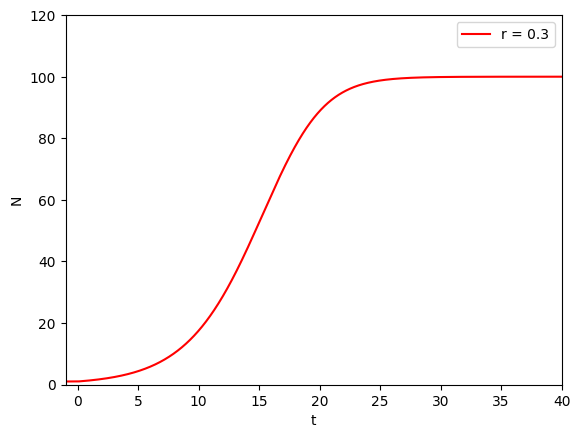

In [3]:
r1 = 0.3

results_4 = dde_heun(derivs=dN_logistic_delays, t0=0, X0=1, t_total=40, 
                      dt=0.01, tau=1, r=r1, B=100)

plt.plot(results_4[:,0], results_4[:,1], color='red')
plt.xlabel('t')
plt.ylabel('N')
plt.xlim(-1, 40)
plt.ylim(-0.05, 120)
plt.legend(['r = 0.3'], loc='upper right')
plt.show()

When $r = 2$, the system quickly converges to a stable oscillation.

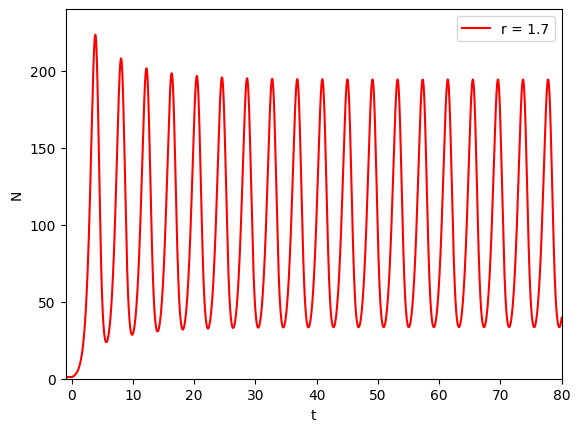

In [4]:
r2 = 1.7

results_5 = dde_heun(derivs=dN_logistic_delays, t0=0, X0=1, t_total=80, 
                      dt=0.01, tau=1, r=r2, B=100)

plt.plot(results_5[:,0], results_5[:,1], color='red')
plt.xlabel('t')
plt.ylabel('N')
plt.xlim(-1, 80)
plt.ylim(-0.05, 240)
plt.legend(['r = 1.7'], loc='upper right')
plt.show()

When $r = \pi/2$ (a critical point), the system slowly decays to a stable oscillation.

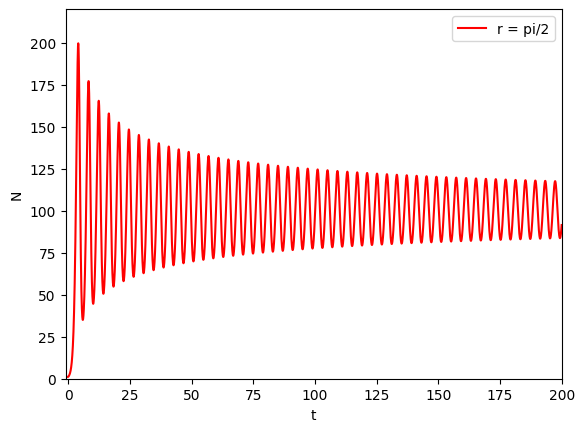

In [5]:
r3 = math.pi/2

results_6 = dde_heun(derivs=dN_logistic_delays, t0=0, X0=1, t_total=200, 
                      dt=0.01, tau=1, r=r3, B=100)

plt.plot(results_6[:,0], results_6[:,1], color='red')
plt.xlabel('t')
plt.ylabel('N')
plt.xlim(-1, 200)
plt.ylim(-0.05, 220)
plt.legend(['r = pi/2'], loc='upper right')
plt.show()

When $r = 1.5$, the system has a damping oscillation to reach the carrying capacity.

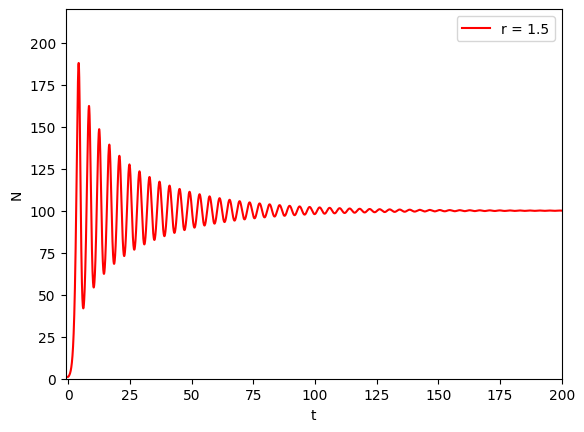

In [6]:
r4 = 1.5

results_7 = dde_heun(derivs=dN_logistic_delays, t0=0, X0=1, t_total=200, 
                      dt=0.01, tau=1, r=r4, B=100)

plt.plot(results_7[:,0], results_7[:,1], color='red')
plt.xlabel('t')
plt.ylabel('N')
plt.xlim(-1, 200)
plt.ylim(-0.05, 220)
plt.legend(['r = 1.5'], loc='upper right')
plt.show()

# One-gene circuit with self-inhibition

In the third example, we consider a one-gene circuit with self-inhibition. We use a fixed time delay $\tau$ to represent the time cost to induce transcription. The rate equation of the gene circuit is

$$ \frac{dX(t)}{dt} = g_0 + g_1\frac{1}{1+ (X(t-\tau)/X_{th})^n} - kX(t) \tag {5}$$

$g_0 + g_1$ represents the maximum transcriptional rate (why?), $g_0$ is the leakage transcriptional rate, $X_{th}$ is the Hill threshold level of $X$, $n$ is the Hill coefficient, and $k$ is the degradation rate.

In [7]:
# Definition of the inhibitory Hill function
def hill_inh(X,X_th,n) :
  a = (X/X_th)**n
  return 1/(1+a)

# DDE derivative function for a one-gene circuit with self-inhibition
# t: current time point
# X: current X level (for t)
# X_old: previous X level (for t - tau)
# g0: parameter, leakage transcriptional rate
# g1: parameter, g0 + g1 is the maximum transcriptional rate
# X_th: parameter, Hill threshold 
# n: parameter, Hill coefficient 
# k: parameter, degradation rate
def f_1g_self_inh_delays(t, X, X_old, g0, g1, X_th, n, k):
   return g0 + g1 * hill_inh(X_old, X_th, n) - k * X

We set $g_0 = 10$, $g_1 = 60$, $X_{th} = 200$, $n = 4$, and $k = 0.1$. For different time delays, the circuit exhibits different types of time dynamics.

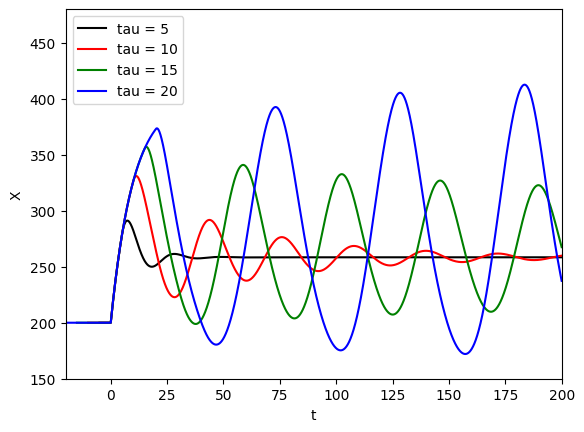

In [8]:
plt.figure()
plt.xlabel('t')
plt.ylabel('X')
plt.xlim(-20, 200)
plt.ylim(150, 480)

tau_all = np.arange(5, 21, 5)
label_all = [f'tau = {tau}' for tau in tau_all]
ntau = len(tau_all)
colors = ["black", "red", "green", "blue"]

for tau, color in zip(tau_all, colors):
    results = dde_heun(derivs=f_1g_self_inh_delays, t0=0, X0=200, t_total=200, 
                       dt=0.01, tau=tau, g0=10, g1=60, X_th=200,
                       n=4, k=0.1)
    plt.plot(results[:, 0], results[:, 1], color=color)

plt.legend(label_all, loc='upper left')
plt.show()

When $\tau = 5$, the system converges to the steady state at around 250. When $\tau$ increases, the time dynamics change to damping oscillation, and eventually stable oscillation. Therefore, with different delays, a self-inhibitory gene may have either a stable steady state or an oscillatory state.

# Lotka-Volterra model with delays

In the last example, we consider the Lotka-Volterra model with time delays. 

\begin{equation}
\begin{cases} \frac{dN}{dt} = N(t) [a - bP(t-\tau_1)] \\
              \frac{dP}{dt} = P(t) [cN(t-\tau_2) -d]  \tag {6}\end{cases}
\end{equation}

In [9]:
# derivatives of the Lotka-Volterra model with two time delays
# Xs_old inputs the previous system levels
def derivs_LV_delays(t, Xs, Xs_old, a, b, c, d) :
    N,P = Xs
    N_old, P_old = Xs_old
    dNdt = N * (a- b*P_old)
    dPdt = P * (c*N_old - d)
    return np.array([dNdt, dPdt])

For simplification, we consider $\tau_1 = \tau_2 = \tau$. Here is the modified *dde_heun* function for a multi-variable system. 

In [10]:
def dde_heun_generic(derivs, t0, X0, t_total, dt, tau, **kwargs):
    """
    Heun's method for DDEs with a constant time delay for a generic multi-variable system.

    Parameters:
    - derivs: The function of the derivatives.
    - t0: Initial time.
    - X0: Initial condition (vector).
    - t_total: Total simulation time.
    - dt: Time step size.
    - tau: A constant time delay.
    - **kwargs: Additional keyword arguments for the derivative function.

    Returns:
    - Matrix of time points and corresponding solutions for all time steps.
    """
    # Save data for all previous time points
    t_all = np.arange(t0 - tau, t_total + dt, step = dt)
    nt_all = len(t_all)
    nx = len(X0)
    X_all = np.zeros((nt_all, nx))

    # Number of delay time steps
    n_delay = int(tau / dt)

    # Constant initial condition between t in [-tau, 0]
    for i in range(0, n_delay + 1):
        X_all[i, :] = X0

    # Heun's method integration loop
    for i in range(n_delay, nt_all - 1):
        k1 = dt * derivs(t_all[i], X_all[i,:], X_all[i - n_delay,:], **kwargs)
        X_all[i + 1,:] = X_all[i,:] + k1
        k2 = dt * derivs(t_all[i + 1], X_all[i + 1,:], X_all[i + 1 - n_delay,:], **kwargs)
        X_all[i + 1,:] = X_all[i,:] + (k1 + k2) / 2

    # Return a matrix of t & X(t) for all time steps
    return np.column_stack((t_all, X_all))


We set $a = d = 1$, $b = 0.03$, $c = 0.02$, and the initial condition  ${X(t = 0)} = (30, 10)$. Without time delays, the system exhibits an oscillation. 

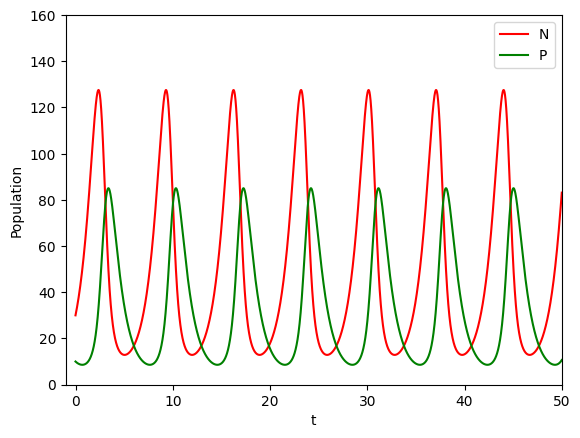

In [11]:
a = 1
b = 0.03
c = 0.02
d = 1
X0 = [30, 10]

# without time delay tau = 0
results_LV_nodelay = dde_heun_generic(derivs = derivs_LV_delays, t0 = 0, X0 = X0, t_total = 50, 
                       dt = 0.01, tau = 0, a = a, b = b, c = c, d = d)

plt.plot(results_LV_nodelay[:,0], results_LV_nodelay[:,1], color='red')
plt.plot(results_LV_nodelay[:,0], results_LV_nodelay[:,2], color='green')
plt.xlabel('t')
plt.ylabel('Population')
plt.xlim(-1, 50)
plt.ylim(-0.05, 160)
plt.legend(["N","P"], loc='upper right')
plt.show()

Even with very small time delays ($\tau = 0.01$, just a delay by a single time step), the system starts to deviate from the stable oscillation. The deviation becomes even larger for larger $\tau$.


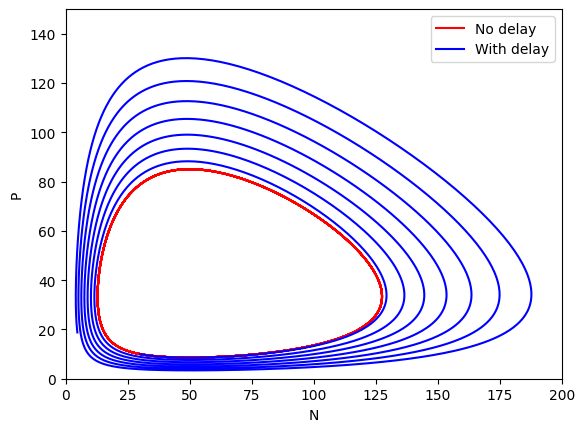

In [12]:
# with time delay tau = 0.01
results_LV_delay = dde_heun_generic(derivs = derivs_LV_delays, t0 = 0, X0 = X0, t_total = 50, 
                       dt = 0.01, tau = 0.01, a = a, b = b, c = c, d = d)

plt.plot(results_LV_nodelay[:,1], results_LV_nodelay[:,2], color='red')
plt.plot(results_LV_delay[:,1], results_LV_delay[:,2], color='blue')
plt.xlabel('N')
plt.ylabel('P')
plt.xlim(0, 200)
plt.ylim(0, 150)
plt.legend(["No delay","With delay"], loc='upper right')
plt.show()

Note that this approach can be further modified for cases where $\tau_1$ and $\tau_2$ are different (think how to make it work).